In [1]:
import os
import numpy as np

def find_info_files(root_dir):
    """
    Recursively finds all info.txt files in the given directory.
    
    Parameters:
        root_dir (str): The root directory to search.
        
    Returns:
        list: List of full file paths for each info.txt found.
    """
    info_files = []
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.lower() == "info.txt":
                info_files.append(os.path.join(subdir, file))
    return info_files

def extract_score(file_path):
    """
    Extracts the score value from an info.txt file.
    
    The file is expected to have a line starting with "score:" followed by a float value.
    
    Parameters:
        file_path (str): Full path to the info.txt file.
        
    Returns:
        float or None: The extracted score if found and parsed successfully, else None.
    """
    with open(file_path, 'r') as f:
        for line in f:
            # Look for the line that starts with "score:" (ignoring leading/trailing whitespace)
            if line.strip().startswith("score:"):
                try:
                    # Split on "score:" and convert the remainder to float
                    score = float(line.strip().split("score:")[-1])
                    return score
                except ValueError:
                    print(f"Could not parse score in file: {file_path}")
                    return None
    return None

def compute_statistics(scores):
    """
    Computes the mean, standard deviation, and count for a list of scores.
    
    Parameters:
        scores (list of float): The list of score values.
        
    Returns:
        tuple: (mean, standard deviation, count)
    """
    scores = np.array(scores)
    mean_val = np.mean(scores)
    std_val = np.std(scores, ddof=1)  # Use sample standard deviation
    n = len(scores)
    return mean_val, std_val, n

def compute_cohens_d(group1, group2):
    """
    Computes Cohen's d between two independent groups using the pooled standard deviation.
    
    Parameters:
        group1 (list of float): Scores for the first group.
        group2 (list of float): Scores for the second group.
        
    Returns:
        float: Cohen's d value.
    """
    mean1, std1, n1 = compute_statistics(group1)
    mean2, std2, n2 = compute_statistics(group2)
    # Compute pooled standard deviation using sample standard deviations
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_std
    return d

if __name__ == '__main__':
    # Set the paths for the original and sample datasets
    original_dataset_path = "../cubicasa5k-3493-cubigraph"
    sample_dataset_path = "../cubicasa5k-sample-114"

    # Find info.txt files
    original_info_files = find_info_files(original_dataset_path)
    sample_info_files = find_info_files(sample_dataset_path)
    
    print(f"Found {len(original_info_files)} info.txt files in original dataset.")
    print(f"Found {len(sample_info_files)} info.txt files in sample dataset.")

    # Extract scores from each file
    original_scores = [extract_score(fp) for fp in original_info_files if extract_score(fp) is not None]
    sample_scores = [extract_score(fp) for fp in sample_info_files if extract_score(fp) is not None]
    
    if not original_scores or not sample_scores:
        print("One of the groups has no valid score data. Please check your info.txt files.")
    else:
        # Compute statistics for each group
        orig_mean, orig_std, orig_n = compute_statistics(original_scores)
        samp_mean, samp_std, samp_n = compute_statistics(sample_scores)
    
        print("\nOriginal Data Statistics:")
        print(f"  Count: {orig_n}")
        print(f"  Mean: {orig_mean:.4f}")
        print(f"  Standard Deviation: {orig_std:.4f}")
    
        print("\nSample Data Statistics:")
        print(f"  Count: {samp_n}")
        print(f"  Mean: {samp_mean:.4f}")
        print(f"  Standard Deviation: {samp_std:.4f}")
    
        # Calculate Cohen's d
        cohens_d = compute_cohens_d(original_scores, sample_scores)
        print("\nCohen's d (Original - Sample): {:.4f}".format(cohens_d))


Found 3493 info.txt files in original dataset.
Found 69 info.txt files in sample dataset.

Original Data Statistics:
  Count: 3488
  Mean: 0.2787
  Standard Deviation: 0.0720

Sample Data Statistics:
  Count: 69
  Mean: 0.3459
  Standard Deviation: 0.1591

Cohen's d (Original - Sample): -0.9012


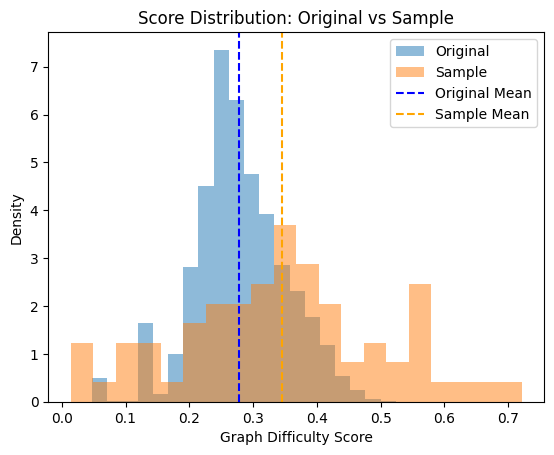

In [2]:
import matplotlib.pyplot as plt

plt.hist(original_scores, bins=20, alpha=0.5, label='Original', density=True)
plt.hist(sample_scores, bins=20, alpha=0.5, label='Sample', density=True)
plt.axvline(np.mean(original_scores), color='blue', linestyle='--', label='Original Mean')
plt.axvline(np.mean(sample_scores), color='orange', linestyle='--', label='Sample Mean')
plt.legend()
plt.title("Score Distribution: Original vs Sample")
plt.xlabel("Graph Difficulty Score")
plt.ylabel("Density")
plt.show()